In [4]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt

In [5]:
# Set random seed for reproducibility
torch.manual_seed(42)

In [6]:
# Generate real data
def generate_real_data(n_samples):
    x1 = torch.rand(n_samples) * 2 * np.pi
    x2 = torch.sin(x1)
    return torch.stack((x1, x2), dim=1)

In [7]:
# Generator Network
class Generator(nn.Module):
    def __init__(self, latent_dim, output_dim):
        super(Generator, self).__init__()
        self.model = nn.Sequential(
            nn.Linear(latent_dim, 128),
            nn.ReLU(),
            nn.Linear(128, 256),
            nn.ReLU(),
            nn.Linear(256, output_dim)
        )

    def forward(self, z):
        return self.model(z)

In [8]:
# Discriminator Network
class Discriminator(nn.Module):
    def __init__(self, input_dim):
        super(Discriminator, self).__init__()
        self.model = nn.Sequential(
            nn.Linear(input_dim, 256),
            nn.ReLU(),
            nn.Linear(256, 128),
            nn.ReLU(),
            nn.Linear(128, 1),
            nn.Sigmoid()
        )

    def forward(self, x):
        return self.model(x)


In [9]:
# Hyperparameters
latent_dim = 2
output_dim = 2
n_samples = 1000
batch_size = 32
n_epochs = 5000
lr = 0.0002


In [10]:
# Initialize networks and optimizers
generator = Generator(latent_dim, output_dim)
discriminator = Discriminator(output_dim)
g_optimizer = optim.Adam(generator.parameters(), lr=lr)
d_optimizer = optim.Adam(discriminator.parameters(), lr=lr)
criterion = nn.BCELoss()


In [11]:
# Training loop
for epoch in range(n_epochs):
    # Train Discriminator
    real_data = generate_real_data(batch_size)
    z = torch.randn(batch_size, latent_dim)
    fake_data = generator(z).detach()

    real_labels = torch.ones(batch_size, 1)
    fake_labels = torch.zeros(batch_size, 1)

    d_loss_real = criterion(discriminator(real_data), real_labels)
    d_loss_fake = criterion(discriminator(fake_data), fake_labels)
    d_loss = (d_loss_real + d_loss_fake) / 2

    d_optimizer.zero_grad()
    d_loss.backward()
    d_optimizer.step()

In [12]:
    # Train Generator
    z = torch.randn(batch_size, latent_dim)
    fake_data = generator(z)
    g_loss = criterion(discriminator(fake_data), real_labels)

    g_optimizer.zero_grad()
    g_loss.backward()
    g_optimizer.step()

    if (epoch + 1) % 500 == 0:
        print(f"Epoch [{epoch+1}/{n_epochs}], D Loss: {d_loss.item():.4f}, G Loss: {g_loss.item():.4f}")

Epoch [5000/5000], D Loss: 0.0196, G Loss: 6.8671


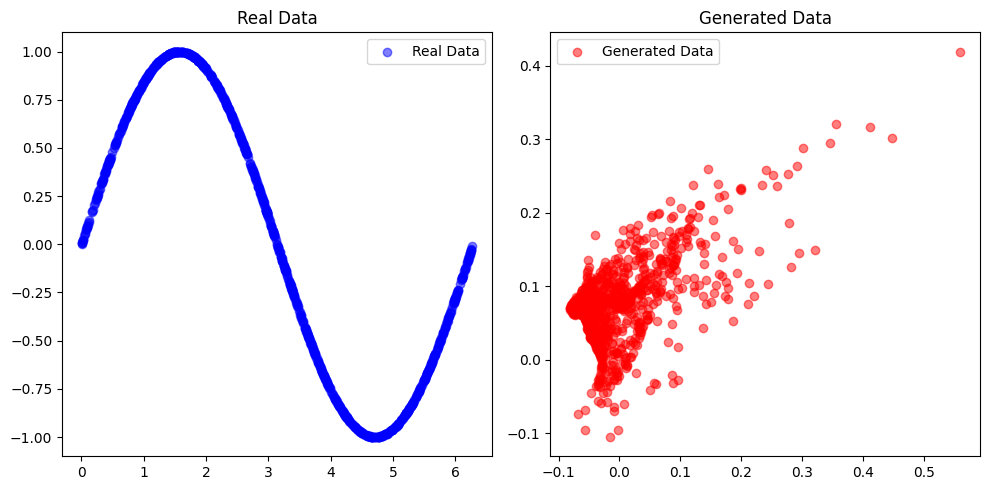

In [13]:
# Generate and plot results
with torch.no_grad():
    z = torch.randn(n_samples, latent_dim)
    generated_data = generator(z).numpy()
    real_data = generate_real_data(n_samples).numpy()

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.scatter(real_data[:, 0], real_data[:, 1], c='blue', alpha=0.5, label='Real Data')
plt.title('Real Data')
plt.legend()

plt.subplot(1, 2, 2)
plt.scatter(generated_data[:, 0], generated_data[:, 1], c='red', alpha=0.5, label='Generated Data')
plt.title('Generated Data')
plt.legend()

plt.tight_layout()
plt.show()